<a href="https://colab.research.google.com/github/patriclockhart/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03_Lockhart_vFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
## read csv online:
df = pd.read_csv(db)


# Explore data

In [94]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [95]:
df.nunique(axis=0, dropna=True)

date        236
county     1923
state        55
fips       3205
cases     16243
deaths     2400
dtype: int64

In [96]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards

## Okay, so this was listed in the class notes and video, so I'm going to say what each command is doing since this is how you do the command.
## For each county, the command finds the dataframe (df) row that matches (by column) with county == Bristol and county == Suffolk, respectively
## as well as where the state column matches Massachusetts.  Then, the fips value for that row is returned as a value of type int.
## The use of .unique()[0] grabs the fips number from the dataframe structure rather than returning the number in a singleton dataframe.
Bristol_fips = df[(df['county'] =='Bristol') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')
Suffolk_fips = df[(df['county'] =='Suffolk') & (df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')

## straight forward, but the fips values for those counties are then shown on screen. the print(f'') command prints the string literal as defined at runtime.
## thus, the values in the {} are calculated from the variables within at the exact place in the code where it is called, such as on each iteration of a loop.
## This was implemented in Python 3.6 and replaces the previous print() format where the values in the {} would be designated by reference numbers which
## were defined with a .format() statement later within the same print() command.
print(f'Bristol_fips = {Bristol_fips}')
print(f'Suffolk_fips = {Suffolk_fips}')



Bristol_fips = 25005
Suffolk_fips = 25025


In [97]:
get_county_stat = df[(df['fips'] == Bristol_fips) | (df['fips'] == Suffolk_fips)]

## the code from the class notes that I didn't use...
## get one fips

## def get_county_stat(df,fips):
##   result = df[df['fips]] == fips][['date','county','state','cases','deaths']].copy()
##   result.set_index('date', inplace = True)
##   result.index = pd.to_datetime(result.index)
##   return result

#get_county_stat(df,25005).head()
get_county_stat[(get_county_stat['fips'] == Bristol_fips)].head()

,date,county,state,fips,cases,deaths
2093,2020-03-14,Bristol,Massachusetts,25005.0,1,0
2494,2020-03-15,Bristol,Massachusetts,25005.0,1,0
2943,2020-03-16,Bristol,Massachusetts,25005.0,2,0
3444,2020-03-17,Bristol,Massachusetts,25005.0,5,0
4026,2020-03-18,Bristol,Massachusetts,25005.0,5,0


## Explore data type

In [98]:
df_Bristol = get_county_stat[(get_county_stat['fips'] == Bristol_fips)].drop('fips',axis=1)
df_Suffolk = get_county_stat[(get_county_stat['fips'] == Suffolk_fips)].drop('fips',axis=1)

#df_Bristol = get_county_stat(df,25005)
#df_Suffolk = get_county_stat(df,25025)


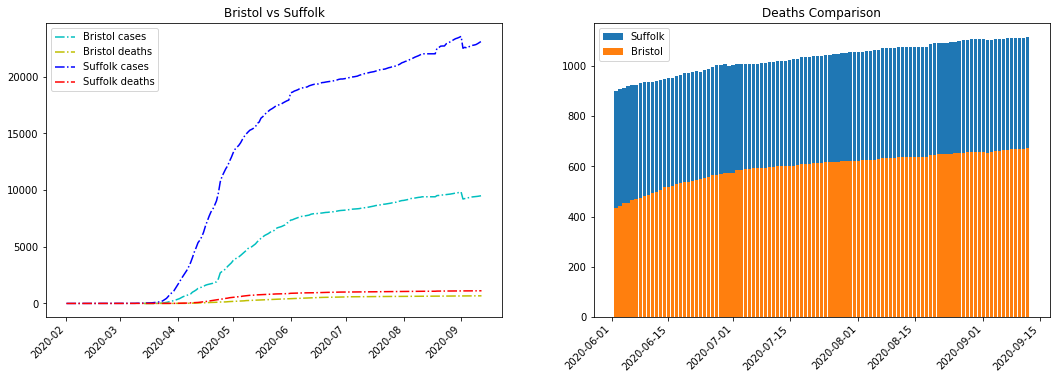

In [101]:
f,ax = plt.subplots(1,2,figsize=(18,6))

ax[0].plot(df_Bristol['date'],df_Bristol['cases'],'c-.',label = 'Bristol cases')
df_Bristol['date'] = pd.to_datetime(df_Bristol['date'])
ax[0].plot(df_Bristol['date'],df_Bristol['deaths'],'y-.',label = 'Bristol deaths')
ax[0].plot(df_Suffolk['date'],df_Suffolk['cases'],'b-.',label = 'Suffolk cases')
## for some reason, this code section will only work if the next line of code is first run uncommented and then run again with it commented.
df_Suffolk['date'] = pd.to_datetime(df_Suffolk['date']) 
##  I don't know why this is the case
ax[0].plot(df_Suffolk['date'],df_Suffolk['deaths'],'r-.',label = 'Suffolk deaths')
ax[0].set_title('Bristol vs Suffolk')
ax[0].legend()


ax[1].set_title('Deaths Comparison')
ax[1].bar(df_Suffolk['date'][122:],df_Suffolk['deaths'][122:],label = 'Suffolk')
ax[1].bar(df_Bristol['date'][80:],df_Bristol['deaths'][80:],label = 'Bristol')
ax[1].legend()
f.autofmt_xdate(rotation=45) #I added this because the extra tick mark in Sept caused word overlap with x-axis ticks.  Comment to make look like the desired output.


In [102]:
df_byDeaths = df.sort_values(by = 'deaths', ascending = False)
df_byDeaths.head(5)
print('Sorted by number of deaths')
print(df_byDeaths.head(10))

df_byCases = df.sort_values(by = 'cases', ascending = False)
print('')
print('')
print('Sorted by number of cases')
print(df_byCases.head(10))


Sorted by number of deaths
              date         county     state  fips   cases  deaths
513692  2020-09-08  New York City  New York   NaN  241141   23744
526635  2020-09-12  New York City  New York   NaN  242242   23743
516927  2020-09-09  New York City  New York   NaN  241351   23741
520163  2020-09-10  New York City  New York   NaN  241686   23741
523399  2020-09-11  New York City  New York   NaN  241936   23739
510459  2020-09-07  New York City  New York   NaN  240919   23736
503994  2020-09-05  New York City  New York   NaN  240416   23721
507226  2020-09-06  New York City  New York   NaN  240711   23721
500760  2020-09-04  New York City  New York   NaN  240139   23716
497526  2020-09-03  New York City  New York   NaN  239815   23710


Sorted by number of cases
              date       county       state    fips   cases  deaths
524973  2020-09-12  Los Angeles  California  6037.0  253176    6197
521737  2020-09-11  Los Angeles  California  6037.0  252066    6171
518500  2020-09

## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

In [103]:
#Death rate should be the .diff() of deaths

def get_death_rate(df,fips):
  get_county = df[df['fips'] == fips].copy()
  sort_county = get_county.sort_values(by = 'date', ascending = True)
  sort_county['Death rate'] = sort_county['deaths'].diff()
  return sort_county

df_DR = get_death_rate(df,Bristol_fips)
df_DR.head(30)

## From here just type in the fips ID for the desired county, and the death rate will be added as the last column to the DataFrame.


,date,county,state,fips,cases,deaths,Death rate
2093,2020-03-14,Bristol,Massachusetts,25005.0,1,0,NaN
2494,2020-03-15,Bristol,Massachusetts,25005.0,1,0,0.0
2943,2020-03-16,Bristol,Massachusetts,25005.0,2,0,0.0
3444,2020-03-17,Bristol,Massachusetts,25005.0,5,0,0.0
4026,2020-03-18,Bristol,Massachusetts,25005.0,5,0,0.0
4730,2020-03-19,Bristol,Massachusetts,25005.0,6,0,0.0
5549,2020-03-20,Bristol,Massachusetts,25005.0,6,0,0.0
6508,2020-03-21,Bristol,Massachusetts,25005.0,14,0,0.0
7585,2020-03-22,Bristol,Massachusetts,25005.0,24,0,0.0
8757,2020-03-23,Bristol,Massachusetts,25005.0,25,0,0.0


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)